In [1]:
#Se realiza la importacion de las librerias necesarias para el funcionamiento del script
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
Clase Julia, la cual contiene el modelo matemático para su funcionamiento y gráficas
"""
class julia():
  def __init__(self, size, c, zmax, kmax, min, max):
    """
    Funcion de constructor del modelo Julia
    """
    self.size = size
    self.c = c
    self.zmax = zmax
    self.kmax = kmax
    self.min = min
    self.max = max
    self.init_system()

  def init_system(self):
    """
    Funcion que inicia el espacio de matrices y el dominio
    de función compleja
    """
    self.values = np.linspace(self.min, self.max, self.size)
    self.image = np.zeros((self.size, self.size))

  def julia_algorithm(self, f, z):
    """
    Funcion que realiza el algortimo de los fractales de Julia
    """
    self.k = 0
    while abs(z) <= self.zmax and self.k < self.kmax:
        z = f(z, self.c)
        self.k += 1
    return self.k

  def interact_system(self, f):
    """
    Función que aplica el algortimo de Julia a cada espacio de la grilla
    creada en init_system
    """
    for x, i in zip(self.values, range(self.size)):
        for y, j in zip(self.values, range(self.size)):
            z = complex(x, y)
            self.image[i, j] = self.julia_algorithm(f, z)
    self.image = self.image/np.max(self.image)

  def plot_system(self, name="image", path=""):
    """
    Funcion que graficara el sistema en la situación actual
    """
    plt.axis("off")
    plt.subplots_adjust(left=0, bottom=0.05, right=1, top=0.95)
    plt.imshow(self.image, cmap="inferno")
    plt.savefig(path+name+".png", bbox_inches="tight",
                pad_inches=0, dpi=400)

In [3]:
def f(z, c):
  """
  Función compleja que será usada en el algoritmo de Julia
  """
  return np.exp(z**2)+c

In [4]:
"""
Seleccion de los parámetros para el algoritmo de Julia
Describción de los parámetros
size ----> Tamaño del espacio de elementos en la grilla (matriz sizeXsize)
c    ----> Número complejo para la función f(z,c)
zmax ----> Modulo máximo del número Z en el grupo de Julia
kmax ----> Máximo de repeticiones de la función f(z,c) sobre z
min  ----> Número complejo minimo por analizar
max  ----> Número complejo máximo por analizar
"""
parameters = {
    "size": 2000,
    "c": -0.65,
    "zmax": 100,
    "kmax": 10,
    "min": -5,
    "max": 5, }

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


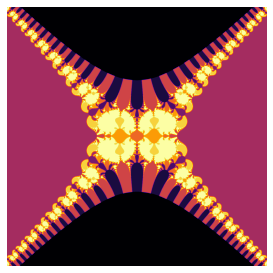

In [5]:
# Inicialización del objeto julia_image con los parámetros
julia_image = julia(parameters["size"],
                    parameters["c"],
                    parameters["zmax"],
                    parameters["kmax"],
                    parameters["min"],
                    parameters["max"])
# Ejecución del algoritmo de julia sobre los parámetros antes introducidos
julia_image.interact_system(f)
# Gráfica del sistema obtenido
julia_image.plot_system()